In [1]:
#importing the dependencies and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Data Collection**

In [2]:
#data collection
calories=pd.read_csv('/content/calories.csv')
exercise=pd.read_csv('/content/exercise.csv')

**Data Preprocessing**

In [3]:
#print the first five rows of calories dataframe'
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
#print the first five rows of exercise dataframe
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


The heart rate is an indirect measurement of the intensity of the exercise. 

In [5]:
#combining the two data frames
df=pd.concat([exercise,calories['Calories']],axis=1)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [6]:
#finding the number of rows and columns in the dataset
df.shape

(15000, 9)

In [7]:
#checking the number of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [10]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [11]:
#dropping User_ID column
df=df.drop(['User_ID'], axis=1)

In [12]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [13]:
#performing label encoding on Gender column
from sklearn import preprocessing

In [14]:
label_encoding=preprocessing.LabelEncoder()

In [15]:
df['Gender']=label_encoding.fit_transform(df['Gender'])

In [16]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,1,78,193.0,97.0,2.0,84.0,38.3,11.0


**Data Analysis**

In [17]:
df.describe()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Data Visualization**

In [18]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

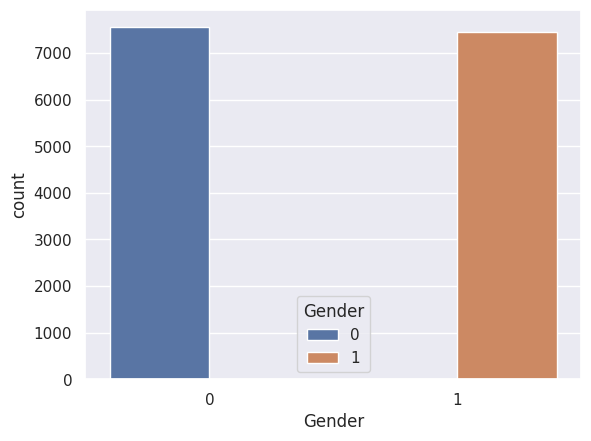

In [19]:
# plotting the gender column in count plot
sns.countplot(x ='Gender', hue = 'Gender', data = df)

<ipython-input-20-5ad4f4f9db2b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='red')


<Axes: xlabel='Age', ylabel='Density'>

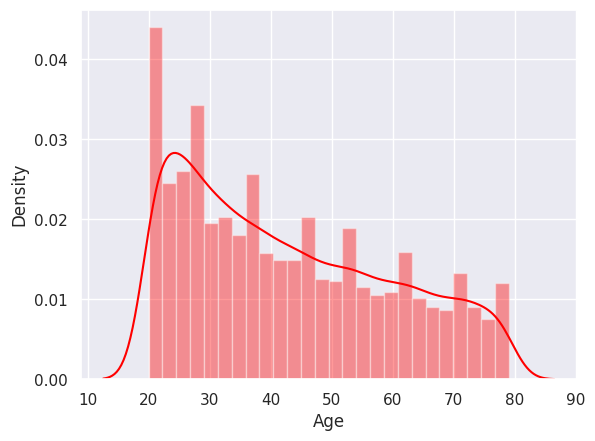

In [20]:
# finding the distribution of 'Age' column
sns.distplot(df['Age'],color='red')

<ipython-input-21-4832ebd3a88a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'],color='pink')


<Axes: xlabel='Height', ylabel='Density'>

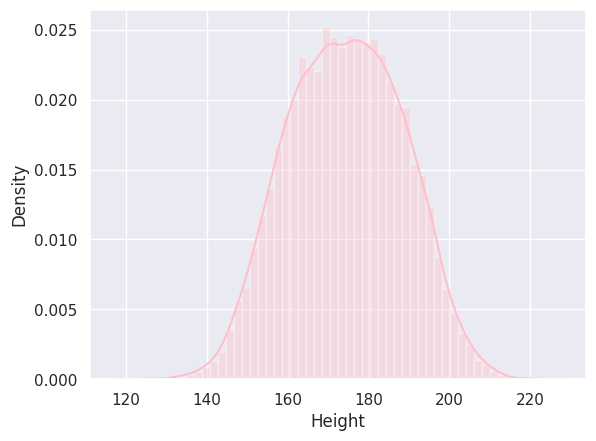

In [21]:
# finding the distribution of 'Height' column
sns.distplot(df['Height'],color='pink')

<ipython-input-22-8e38829065ed>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'],color='purple')


<Axes: xlabel='Weight', ylabel='Density'>

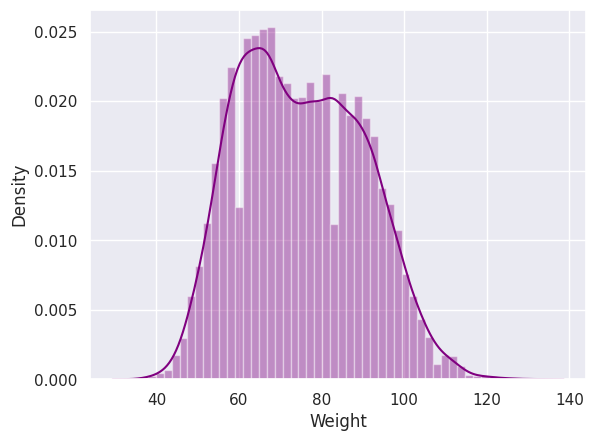

In [22]:
# finding the distribution of 'Duration' column
sns.distplot(df['Weight'],color='purple')

<ipython-input-23-f6f3bf104bf7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration'],color='green')


<Axes: xlabel='Duration', ylabel='Density'>

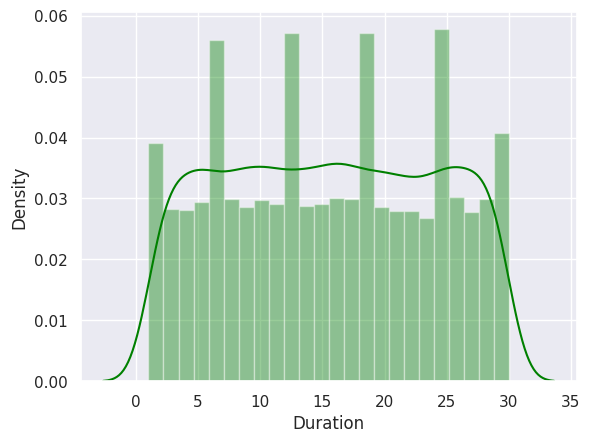

In [23]:
# finding the distribution of 'Duration' column
sns.distplot(df['Duration'],color='green')

<ipython-input-24-c65c77bab603>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Heart_Rate'],color='yellow')


<Axes: xlabel='Heart_Rate', ylabel='Density'>

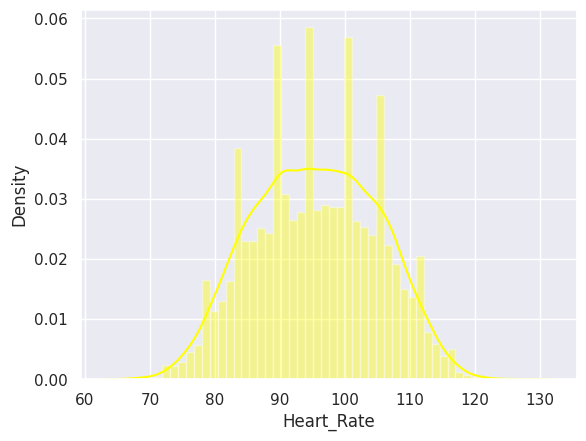

In [24]:
# finding the distribution of 'Heart_Rate' column
sns.distplot(df['Heart_Rate'],color='yellow')

<ipython-input-25-031cd1d12663>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Body_Temp'],color='indigo')


<Axes: xlabel='Body_Temp', ylabel='Density'>

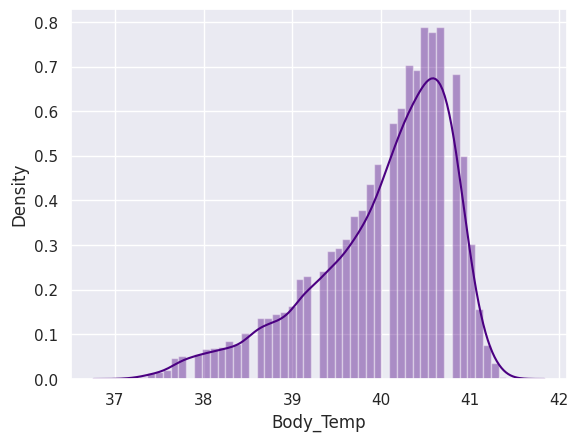

In [25]:
# finding the distribution of 'Body_Temp' column
sns.distplot(df['Body_Temp'],color='indigo')

**Finding Correlation Between Features**

<Axes: xlabel='Gender', ylabel='Calories'>

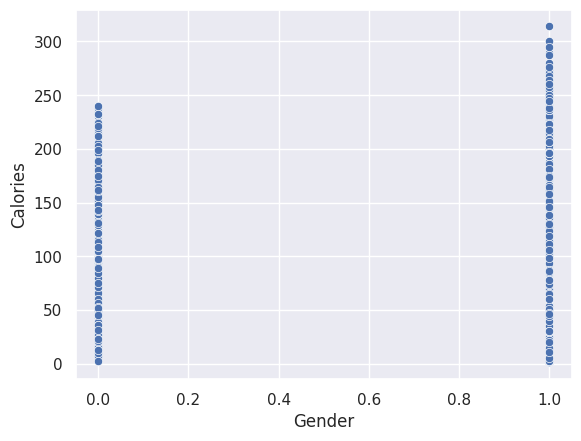

In [26]:
sns.scatterplot(x='Gender',y='Calories',data=df)

In [27]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

<Axes: xlabel='Height', ylabel='Calories'>

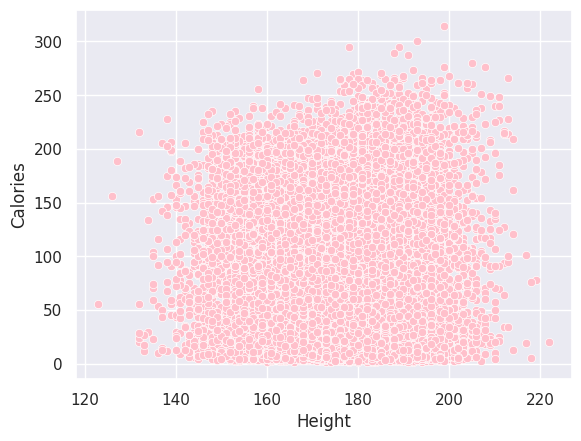

In [28]:
sns.scatterplot(x='Height',y='Calories',color='pink',data=df)

<Axes: xlabel='Weight', ylabel='Calories'>

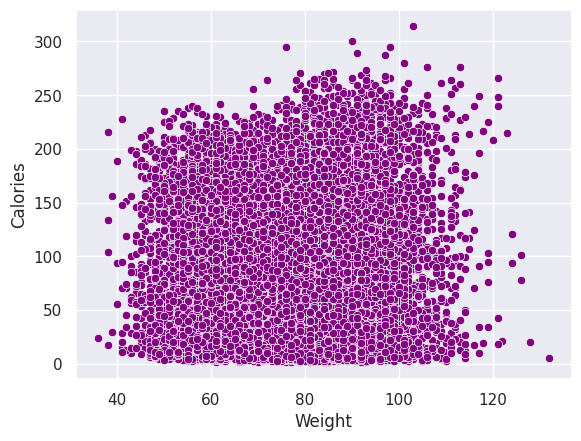

In [29]:
sns.scatterplot(x='Weight',y='Calories',color='purple',data=df)

<Axes: xlabel='Age', ylabel='Calories'>

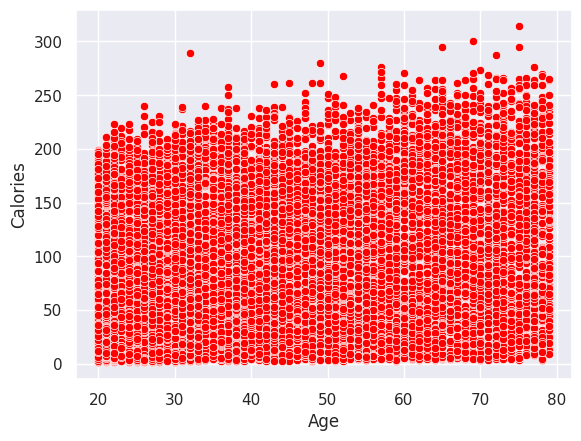

In [30]:
sns.scatterplot(x='Age',y='Calories',color='red',data=df)

<Axes: xlabel='Duration', ylabel='Calories'>

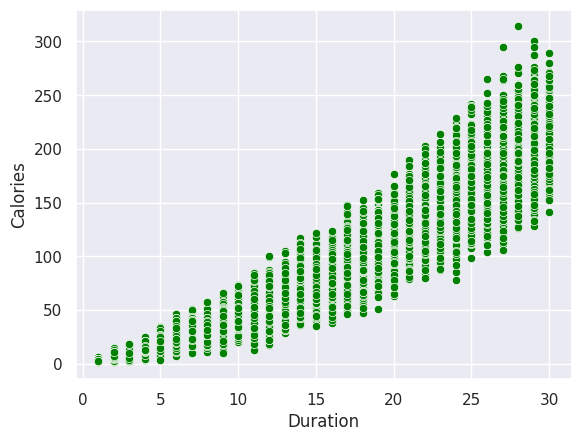

In [31]:
sns.scatterplot(x='Duration',y='Calories',color='green',data=df)

<Axes: xlabel='Heart_Rate', ylabel='Calories'>

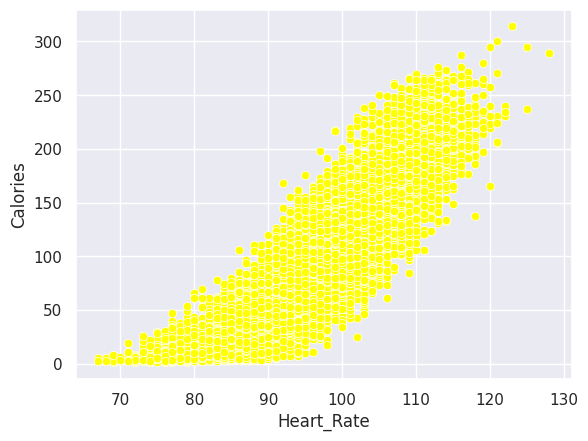

In [32]:
sns.scatterplot(x='Heart_Rate',y='Calories',color='yellow',data=df)

<Axes: xlabel='Body_Temp', ylabel='Calories'>

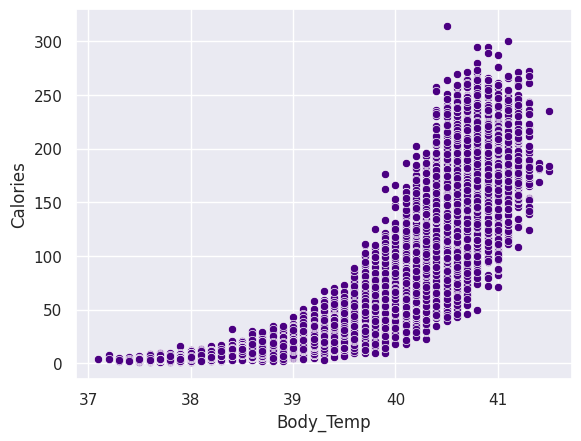

In [33]:
sns.scatterplot(x='Body_Temp',y='Calories',color='indigo',data=df)

<Axes: xlabel='Duration', ylabel='Heart_Rate'>

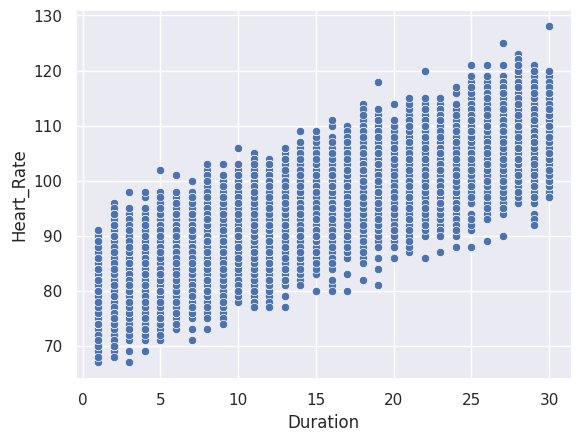

In [34]:
sns.scatterplot(x='Duration',y='Heart_Rate',data=df)

<Axes: xlabel='Duration', ylabel='Body_Temp'>

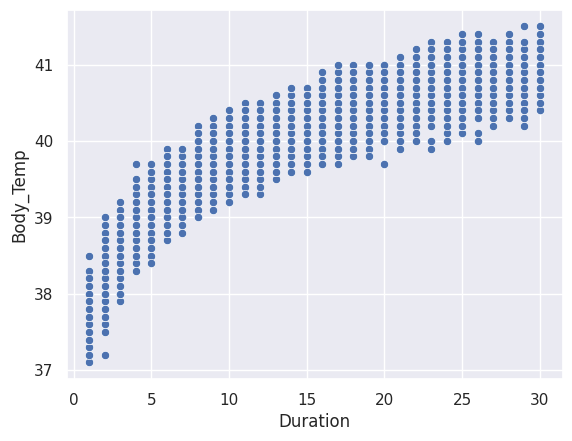

In [35]:
sns.scatterplot(x='Duration',y='Body_Temp',data=df)

<Axes: xlabel='Body_Temp', ylabel='Heart_Rate'>

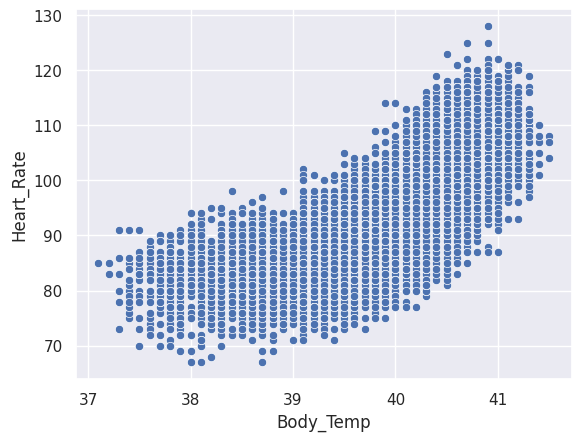

In [36]:
sns.scatterplot(x='Body_Temp',y='Heart_Rate',data=df)

In [37]:
correlation = df.corr()

<Axes: >

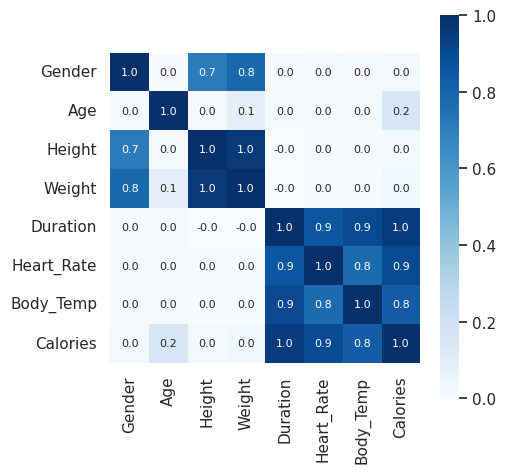

In [38]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**Separating Features and Target**

In [39]:
x=df.drop(columns=['Calories'],axis=1)
y=df['Calories']

In [40]:
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [41]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

**Splitting the Data into Training and Testing Data**

In [42]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size= 0.2,random_state=2)

In [73]:
x_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
1154,0,38,169.0,67.0,3.0,85.0,38.5
9804,1,30,194.0,96.0,9.0,91.0,39.6
7919,0,78,182.0,79.0,7.0,84.0,39.4
4854,1,50,171.0,77.0,29.0,111.0,40.8
5947,0,32,172.0,66.0,29.0,105.0,40.8
...,...,...,...,...,...,...,...
11798,0,49,178.0,71.0,12.0,98.0,39.9
13896,0,67,159.0,58.0,23.0,101.0,40.4
6637,0,25,167.0,64.0,20.0,100.0,40.4
2575,0,36,167.0,64.0,28.0,108.0,40.8


In [45]:
x_test

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
7592,0,41,172.0,74.0,24.0,98.0,40.8
3551,1,70,189.0,96.0,24.0,113.0,40.9
9698,0,53,173.0,68.0,7.0,96.0,39.3
3759,1,36,191.0,96.0,2.0,82.0,38.4
2353,0,46,169.0,68.0,20.0,111.0,40.6
...,...,...,...,...,...,...,...
8859,0,20,161.0,60.0,29.0,107.0,40.3
2886,0,40,152.0,49.0,11.0,87.0,39.8
14357,0,57,160.0,62.0,23.0,103.0,40.2
9430,0,58,171.0,67.0,6.0,82.0,39.4


**XGBoost Regression Model**

In [46]:
#loading the model
xgb_model=XGBRegressor()

In [47]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
#predicting y using the trained model
y_pred=xgb_model.predict(x_test)

In [49]:
y_pred

array([127.823784, 226.00154 ,  38.66253 , ..., 144.3636  ,  22.767195,
        89.87375 ], dtype=float32)

In [50]:
print('R2=',r2_score(y_test,y_pred))

R2= 0.9988455491362879


In [51]:
mae=metrics.mean_absolute_error(y_test,y_pred)

In [52]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4807048829992613


In [53]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [54]:
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  2.12938076108955


**Multiple Linear Regression Model**

In [55]:
x_train_mlr= x_train.drop(columns=['Gender','Age','Height','Weight'])
x_test_mlr=x_test.drop(columns=['Gender','Age','Height','Weight'])

In [56]:
x_train_mlr

,Duration,Heart_Rate,Body_Temp
1154,3.0,85.0,38.5
9804,9.0,91.0,39.6
7919,7.0,84.0,39.4
4854,29.0,111.0,40.8
5947,29.0,105.0,40.8
...,...,...,...
11798,12.0,98.0,39.9
13896,23.0,101.0,40.4
6637,20.0,100.0,40.4
2575,28.0,108.0,40.8


In [57]:
x_test_mlr

,Duration,Heart_Rate,Body_Temp
7592,24.0,98.0,40.8
3551,24.0,113.0,40.9
9698,7.0,96.0,39.3
3759,2.0,82.0,38.4
2353,20.0,111.0,40.6
...,...,...,...
8859,29.0,107.0,40.3
2886,11.0,87.0,39.8
14357,23.0,103.0,40.2
9430,6.0,82.0,39.4


In [58]:
LR=LinearRegression()

In [59]:
MLR=LR.fit(x_train_mlr,y_train)

In [60]:
y_mlr_pred=LR.predict(x_test_mlr)

In [61]:
x_mlr= x.drop(columns=['Gender','Age','Height','Weight'])

In [62]:
print(pd.Series(MLR.coef_, index = x_mlr.columns))

Duration       6.651392
Heart_Rate     1.978966
Body_Temp    -16.988637
dtype: float64


In [75]:
print('MSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE: 2.12938076108955


In [63]:
print('\nr2: ',r2_score(y_test,y_mlr_pred))


r2:  0.9448268728397609


**Ridge Regression**

In [92]:
ridge = Ridge(alpha = 5)


In [99]:
ridge.fit(x_train, y_train)  

Ridge(alpha=5)

In [100]:
y_ridge_pred = ridge.predict(x_test)

In [101]:
print(pd.Series(ridge.coef_, index = x.columns))

Gender        -1.412801
Age            0.497175
Height        -0.193962
Weight         0.312969
Duration       6.634823
Heart_Rate     1.987200
Body_Temp    -17.025292
dtype: float64


In [102]:
print('MSE=',mean_squared_error(y_test, y_ridge_pred))

MSE= 130.0788779730233


In [103]:
print('R2=',r2_score(y_test,y_ridge_pred))

R2= 0.9668811244414184
